## Second Model: Neural Net

In [33]:
import pandas as pd
import numpy as np

df = pd.read_csv('StudentsPerformance.csv')
df.gender = df.gender == 'male'
df.lunch = df.lunch == 'standard'
df['test preparation course'] = df['test preparation course'] == 'completed'
df['race/ethnicity'] = df['race/ethnicity'].map({'group A': 0, 'group B': 1, 'group C': 2, 'group D': 3, 'group E': 4, 'group F': 5, 'group G': 6})
df['parental level of education'] = df['parental level of education'].map({'some high school': 0, 
                                    'high school': 1, "some college": 2, "associate's degree": 3, 
                                    "bachelor's degree": 4, "master's degree": 5})

df['avg score'] = df[['math score', 'reading score', 'writing score']].mean(axis=1)
df['passed'] = df['avg score'] >= 75
df_avg = df.drop(columns=['math score', 'reading score', 'writing score'])

### neural net

In [34]:
from sklearn.model_selection import train_test_split

X_train_neural, X_test_neural, y_train_neural, y_test_neural = train_test_split(df_avg.drop(['avg score', 'passed'], axis=1), df_avg['passed'], test_size=0.2, random_state=21)
# we want to create a validation part of the training data to check for fitting later
val_train_x = X_train_neural[:100]
X_train_neural = X_train_neural[100:]
val_train_y = y_train_neural[:100]
y_train_neural = y_train_neural[100:]

from keras.models import Sequential
from keras.layers import Dense

neural_net = Sequential()

neural_net.add(Dense(units = 16, activation = 'relu', input_dim = 5))
neural_net.add(Dense(units = 8, activation = 'tanh'))
neural_net.add(Dense(units = 6, activation = 'linear'))
neural_net.add(Dense(units = 1, activation = 'sigmoid'))

/var/folders/1h/wr880g910976xz14jz1c6l0m0000gn/T/ipykernel_78491/2615086626.py:7: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  val_train_y = y_train_neural[:100]
/var/folders/1h/wr880g910976xz14jz1c6l0m0000gn/T/ipykernel_78491/2615086626.py:8: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  y_train_neural = y_train_neural[100:]


In [35]:
neural_net.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy')
history = neural_net.fit(X_train_neural.astype(float), y_train_neural, batch_size = 1, epochs = 50, validation_data =(val_train_x.astype(float), val_train_y))
neural_net.fit(X_train_neural.astype(float), y_train_neural, batch_size = 1, epochs = 50)

Epoch 1/50
700/700 [==============================] - 2s 2ms/step - loss: 0.6551 - val_loss: 0.6931
Epoch 2/50
700/700 [==============================] - 1s 1ms/step - loss: 0.6191 - val_loss: 0.6605
Epoch 3/50
700/700 [==============================] - 1s 958us/step - loss: 0.5952 - val_loss: 0.6676
Epoch 4/50
700/700 [==============================] - 1s 1ms/step - loss: 0.5857 - val_loss: 0.7130
Epoch 5/50
700/700 [==============================] - 1s 1ms/step - loss: 0.5855 - val_loss: 0.6909
Epoch 6/50
700/700 [==============================] - 1s 1ms/step - loss: 0.5868 - val_loss: 0.6978
Epoch 7/50
700/700 [==============================] - 1s 959us/step - loss: 0.5838 - val_loss: 0.7056
Epoch 8/50
700/700 [==============================] - 1s 948us/step - loss: 0.5795 - val_loss: 0.6570
Epoch 9/50
700/700 [==============================] - 1s 1ms/step - loss: 0.5832 - val_loss: 0.6885
Epoch 10/50
700/700 [==============================] - 1s 953us/step - loss: 0.5808 - val_loss

In [36]:
yhat_test_neural = neural_net.predict(X_test_neural.astype(float))
yhat_test_neural = [ 1 if y>=0.5 else 0 for y in yhat_test_neural ]
pd.Series(yhat_test_neural)

yy_test_neural = y_test_neural.astype(int).reset_index(drop = True)

7/7 [==============================] - 0s 1ms/step


In [37]:
#(i and j) or (not (i or j))
def xnor(i, j):
  return int((i and j) or (not (i or j)))

In [38]:
testdf = pd.DataFrame()
testdf['yhat_test'] = yhat_test_neural
testdf['y_test'] = yy_test_neural
testdf['correct'] = testdf.apply(lambda x: xnor(x.yhat_test, x.y_test), axis=1)
testdf

,yhat_test,y_test,correct
0,0,1,0
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
195,0,0,1
196,0,0,1
197,0,1,0
198,0,0,1


In [39]:
print("Total " + str(testdf.shape[0]))
print("Correct " + str(testdf.correct.sum()))
print("Wrong " + str(testdf.shape[0] - testdf.correct.sum()))

Total 200
Correct 147
Wrong 53


### Checking for Underfitting and Overfitting

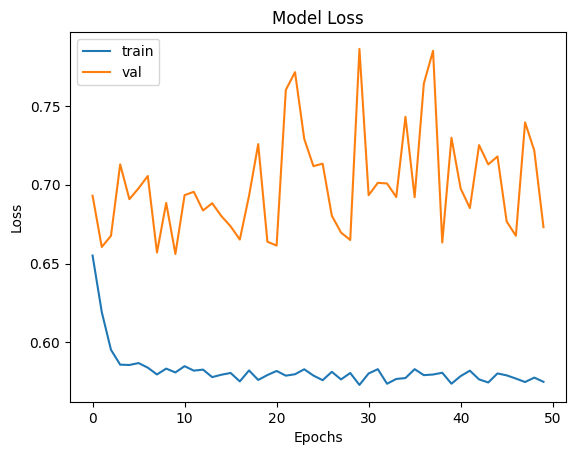

In [40]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train','val'], loc = 'upper left')
plt.show()

### Create and display confusion matrix

array([[138,   7],
       [ 46,   9]])

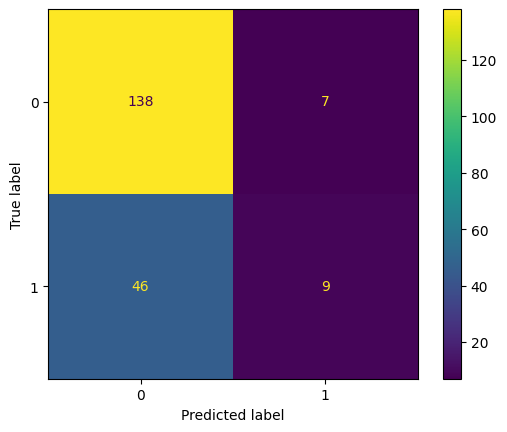

In [41]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Let's create our confusion matrix and display it
myconfusionmatrix_neural = confusion_matrix(y_test_neural, yhat_test_neural)
display(myconfusionmatrix_neural)

mycmdisp_neural = ConfusionMatrixDisplay(confusion_matrix=myconfusionmatrix_neural)
mycmdisp_neural.plot()

In [42]:
# Let's import our classification report and print it
from sklearn.metrics import classification_report
print('testing classification report')
print(classification_report(y_test_neural, yhat_test_neural))

print('training classification report')
yhat_train_neural = neural_net.predict(X_train_neural.astype(float))
yhat_train_neural = [ 1 if y>=0.5 else 0 for y in yhat_train_neural]
yy_train_neural = y_train_neural.astype(int).reset_index(drop = True)
pd.Series(yhat_train_neural)

testdf = pd.DataFrame()
testdf['yhat_train'] = yhat_train_neural
testdf['y_train'] = yy_train_neural
testdf['correct'] = testdf.apply(lambda x: xnor(x.yhat_train, x.y_train), axis=1)

print(classification_report(y_train_neural, yhat_train_neural))


testing classification report
              precision    recall  f1-score   support

       False       0.75      0.95      0.84       145
        True       0.56      0.16      0.25        55

    accuracy                           0.73       200
   macro avg       0.66      0.56      0.55       200
weighted avg       0.70      0.73      0.68       200

training classification report
22/22 [==============================] - 0s 861us/step
              precision    recall  f1-score   support

       False       0.71      0.91      0.80       470
        True       0.58      0.26      0.36       230

    accuracy                           0.69       700
   macro avg       0.65      0.58      0.58       700
weighted avg       0.67      0.69      0.65       700



In [43]:
def TP(i, j):
    return i and j

def TN(i, j):
    return not i and not j

In [44]:
# testing
print('totals for testing set')
print(f'total positive for testing: {np.count_nonzero(yhat_test_neural)}')
testdf = pd.DataFrame()
testdf['yhat_test'] = yhat_test_neural
testdf['y_test'] = np.array(y_test_neural)
print(f'TP: {np.count_nonzero(testdf.apply(lambda i: TP(i.yhat_test, i.y_test), axis=1))}')
print(f'TN: {np.count_nonzero(testdf.apply(lambda i: TN(i.yhat_test, i.y_test), axis=1))}')

# training
print('totals for training set')
print(f'total positive for training: {np.count_nonzero(yhat_train_neural)}')
traindf = pd.DataFrame()
traindf['yhat_train'] = yhat_train_neural
traindf['y_train'] = np.array(y_train_neural)
print(f'TP: {np.count_nonzero(traindf.apply(lambda i: TP(i.yhat_train, i.y_train), axis=1))}')
print(f'TN: {np.count_nonzero(traindf.apply(lambda i: TN(i.yhat_train, i.y_train), axis=1))}')

totals for testing set
total positive for testing: 16
TP: 9
TN: 138
totals for training set
total positive for training: 102
TP: 59
TN: 427


## Calculations of TP, FP, TN, FN for Neural Net model
### Testing

- total positive = 62
- total negative = 200 - 62 = 138

- true positive = 27
- false positive = 62 - 27 = 35

- true negative = 110
- false negative = 138 - 110 = 28

### Training Set
- total positive = 305
- total negative = 800 - 305 = 495

- true positive = 160
- false positive = 305 - 160 = 145

- true negative = 386
- false negative = 495 - 386 = 109
